<a href="https://colab.research.google.com/github/aishwaryachand/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

### Introduction 

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from pandas.plotting import scatter_matrix
!pip install tabulate
from tabulate import tabulate
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 



In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
data = pd.read_csv("/gdrive/MyDrive/creditcard.csv")

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not shared . Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28



---



Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



## Exploratory Data Analysis

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Handling missing values

In [ ]:
data.isnull().values.any()

False

This shows that there are no missing values in the data

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data['Class'].unique()

array([0, 1])

In [6]:
print('Genuine', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Genuine 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Checking the frequency of frauds

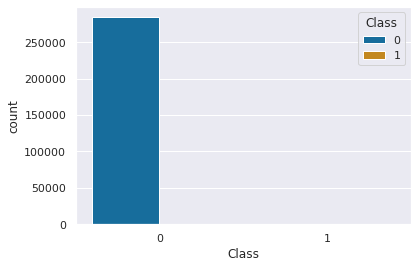

In [ ]:
sns.set(style='darkgrid', palette='colorblind')
sns.countplot(x=data.Class, hue=data['Class'])

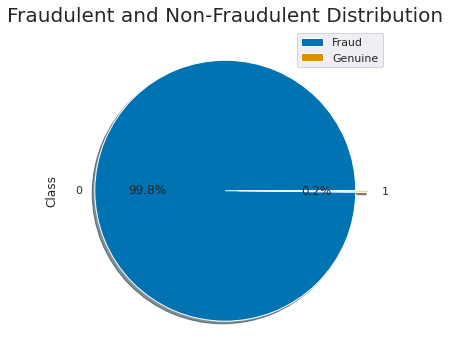

In [ ]:
data.Class.value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])

In [7]:
LABELS = ['Genuine', 'Fraud']

Text(0.5, 1.0, 'Transactions Amt Vs Genuine & Fraud Transactions')

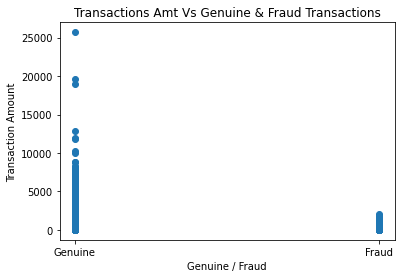

In [8]:
plt.scatter('Class','Amount',data =data)
plt.xlabel('Genuine / Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(range(2),LABELS)
plt.title('Transactions Amt Vs Genuine & Fraud Transactions')

## Observe The distribution of classes with time 


In [9]:
fraud = data[data['Class'] == 1]
genuine = data[data['Class'] == 0]

Text(0.5, 0, 'Second elapsed between the transaction and the first transaction')

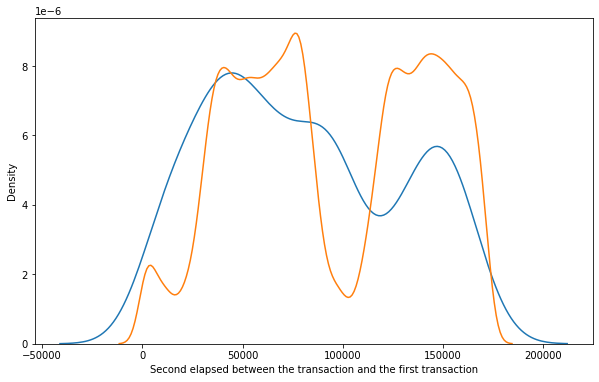

In [12]:
#distribution plot 

plt.figure(figsize= (10,6))
ax = sns.distplot(fraud['Time'], label ='fraudulent',hist = False)
ax = sns.distplot(genuine['Time'], label = 'non fraudulent' , hist = False)

ax.set_xlabel("Second elapsed between the transaction and the first transaction" )

## **Analysis**
No specific pattern for the Fraud and Genuine transctions with respect to Time is visible 
Hence, the Time attribute is dropped.

In [13]:
data.drop('Time',axis = 1  ,inplace = True)

### Observe the distribution of classes with amount 



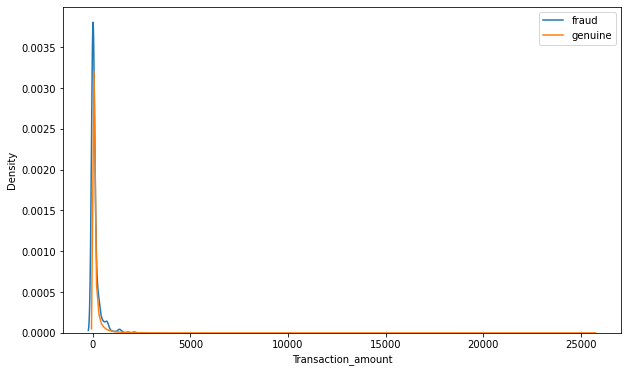

In [14]:
plt.figure(figsize= (10,6))

ax = sns.distplot(fraud['Amount'] , label ='fraud' , hist = False)
ax = sns.distplot(genuine['Amount'] , label = 'genuine' , hist = False)
ax.set_xlabel('Transaction_amount')
ax.legend()

We can see that the fraudulent transactions are mostly densed in the lower range of amount, whereas the non-fraudulent transactions are spread throughout low to high range of amount.

## Scale the data


Based on the description of the data given ,all the features have already through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).So before going further the amount attribute also needs to be scaled.

In [15]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

scaler = StandardScaler() # object of the class StandardScaler ()
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


## **Separate Target Variable and Predictor Variables**

In [17]:
# Separate Target Variable and Predictor Variables
X = data.drop(['Class','Amount'] , axis =1)
y = data['Class']


In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled'],
      dtype='object')

## **Train Test Split** 

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3,random_state =101)

In [19]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


### Class Imbalance
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class.
This was often regarded as a problem in learning from highly imbalanced datasets.

## **Synthetic Minority OverSampling Technique (SMOTE)**
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling Technique, or SMOTE for short.


### Import imbalace technique algorithims

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
from collections import Counter # counter takes values returns value_counts dictionary
print('Original dataset shape %s' % Counter(y_train))


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


## **Logistic Regression** 

In [46]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred1 = logreg.predict(X_test)

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred1))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred1)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred1)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred1)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred1)))

Accuracy :0.97662
AUC : 0.93976
Precision : 0.06149
Recall : 0.90278
F1 : 0.11515


AUC -  0.9397592097601769 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

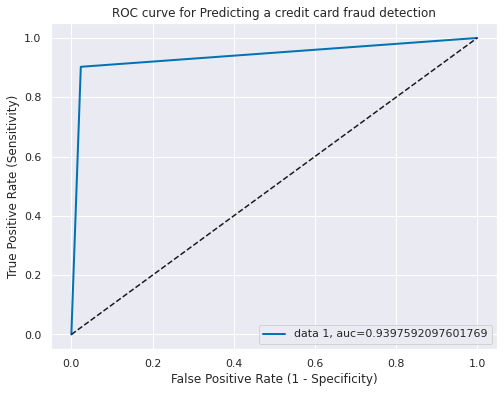

In [48]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds1 = metrics.roc_curve(y_test, y_pred1)

auc = metrics.roc_auc_score(y_test, y_pred1)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


f1=0.115


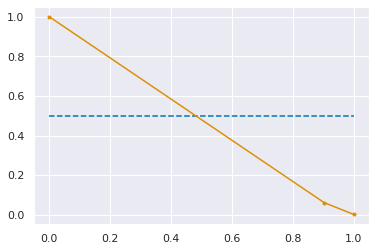

In [49]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred1)
sns.set(style='darkgrid', palette='colorblind')
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred1)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

Text(30.5, 0.5, 'Actual')

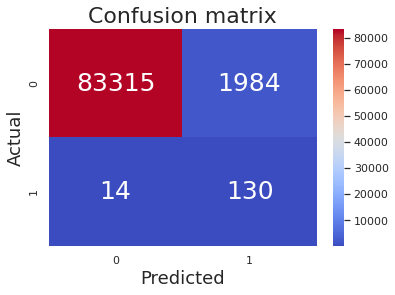

In [50]:
# Heatmap for Confusion Matrix
from google.colab import files
cnf_matrix = metrics.confusion_matrix(y_test , y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="coolwarm" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


In [51]:
# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred1)

print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
 [[83315  1984]
 [   14   130]]




---



---



## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier = RandomForestClassifier(random_state = 101)
rdf_classifier.fit(X_train_smote,y_train_smote)
y_pred2 = rdf_classifier.predict(X_test)

In [52]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred2))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred2)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred2)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred2)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred2)))

Accuracy :0.99951
AUC : 0.91656
Precision : 0.86957
Recall : 0.83333
F1 : 0.85106


AUC -  0.916561155464894 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

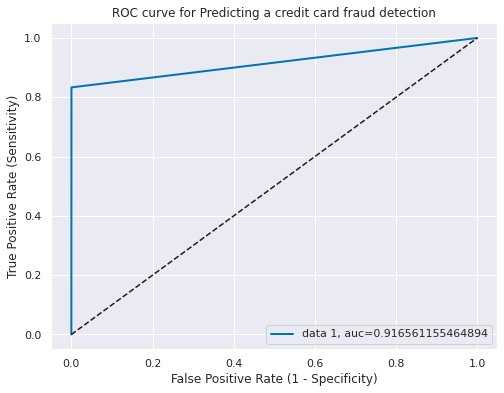

In [53]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred2)

auc = metrics.roc_auc_score(y_test, y_pred2)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [54]:
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred2)
print('f1=%.3f' % (f1))

f1=0.851


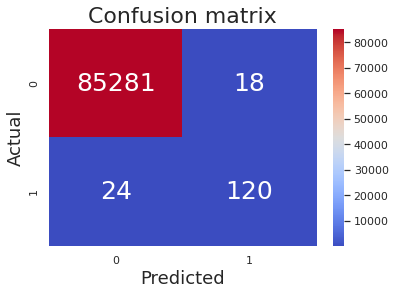

In [55]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="coolwarm" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

In [56]:
# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred2)

print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
 [[85281    18]
 [   24   120]]




---



---



## **Naive Bayes**

In [60]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_smote,y_train_smote)

y_pred3 = nb_classifier.predict(X_test)

In [61]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred3))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred3)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred3)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred3)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred3)))

Accuracy :0.97548
AUC : 0.91839
Precision : 0.05639
Recall : 0.86111
F1 : 0.10585


AUC -  0.9183924586845489 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

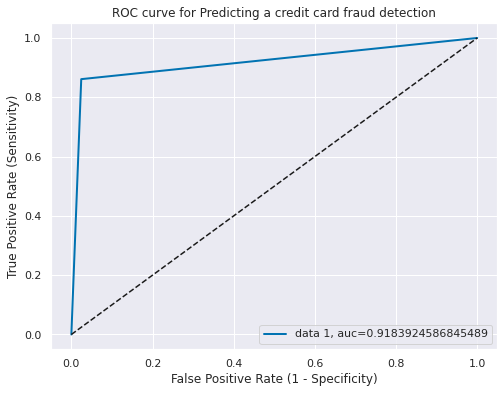

In [62]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred3)

auc = metrics.roc_auc_score(y_test, y_pred3)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

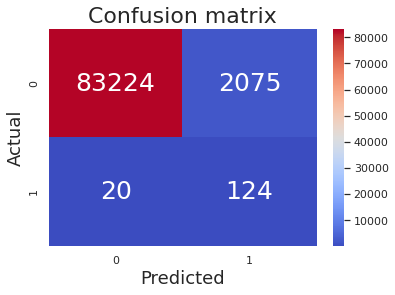

In [63]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred3)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="coolwarm" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

In [64]:
# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred3)

print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
 [[83224  2075]
 [   20   124]]




---



## **XGboost**

In [66]:
from xgboost import XGBClassifier
# fit model no training data
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train,y_train)

# make predictions for test data
y_pred4 = XGB_classifier.predict(X_test)


In [67]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred4))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred4)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred4)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred4)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred4)))

Accuracy :0.99957
AUC : 0.89926
Precision : 0.93496
Recall : 0.79861
F1 : 0.86142


AUC -  0.8992586616881011 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

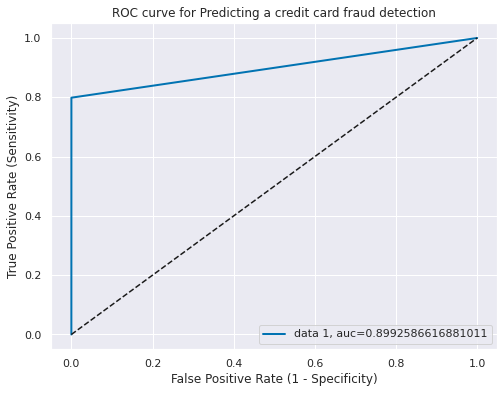

In [68]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred4)

auc = metrics.roc_auc_score(y_test, y_pred4)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Text(30.5, 0.5, 'Actual')

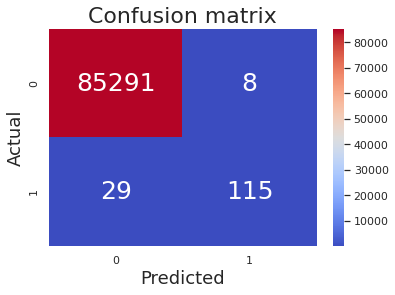

In [69]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred4)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="coolwarm" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)




---





## **Comparison Of All The Models**

In [76]:
print()
print('========================== Model Evaluation Results ========================' "\n")  
print()
print('Accuracy for Logistic Regression Model :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred1))) 
print('Accuracy for Random Forest Model:{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred2))) 
print('Accuracy for Naive Bayes Model:{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred3))) 
print('Accuracy XG Boost Classifier:{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred4))) 


========================== Model Evaluation Results ========================


Accuracy for Logistic Regression Model :0.97662
Accuracy for Random Forest Model:0.99951
Accuracy for Naive Bayes Model:0.97548
Accuracy XG Boost Classifier:0.99957




---



In [77]:
from sklearn.metrics import roc_curve
fp1, tp1, thresholds1 = roc_curve(y_test, y_pred1)
fp2, tp2, thresholds2 = roc_curve(y_test, y_pred2)
fp3, tp3, thresholds3 = roc_curve(y_test, y_pred3)
fp4, tp4, thresholds4 = roc_curve(y_test, y_pred4)
print()
print('========================== Model Evaluation Results ========================' "\n")  
print()
print('AUC for Logistic Regression Model: {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred1)))
print('AUC for Random Forest Model: {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred2)))
print('AUC for Naive Bayes Model: {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred3)))
print('AUC for XG Boost Classifier: {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred4)))



========================== Model Evaluation Results ========================


AUC for Logistic Regression Model: 0.93976
AUC for Random Forest Model: 0.91656
AUC for Naive Bayes Model: 0.91839
AUC for XG Boost Classifier: 0.89926


In [ ]:
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(12,10))

fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred4)

auc = metrics.roc_auc_score(y_test, y_pred4)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [81]:
auc1 = metrics.roc_auc_score(y_test , y_pred1)
auc2 = metrics.roc_auc_score(y_test , y_pred2)
auc3 = metrics.roc_auc_score(y_test , y_pred3)
auc4 = metrics.roc_auc_score(y_test , y_pred4)

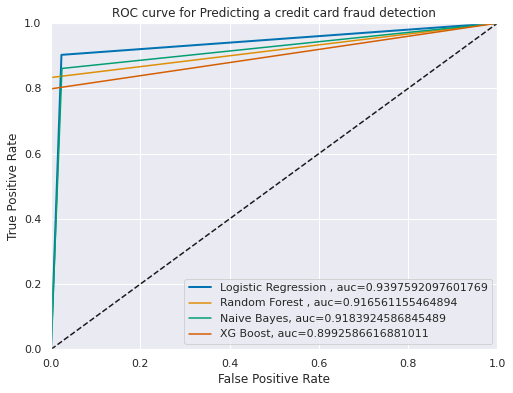

In [85]:
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))
plt.plot(fp1, tp1,linewidth=2, label="Logistic Regression , auc="+str(auc1))
plt.plot(fp2, tp2, label="Random Forest , auc="+str(auc2))
plt.plot(fp3, tp3, label="Naive Bayes, auc="+str(auc3))
plt.plot(fp4, tp4, label="XG Boost, auc="+str(auc4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.legend(loc="lower right")
plt.show()

In [95]:
accu1 = metrics.accuracy_score(y_test , y_pred1)*100
accu2 = metrics.accuracy_score(y_test , y_pred2)*100
accu3 = metrics.accuracy_score(y_test , y_pred3)*100
accu4 = metrics.accuracy_score(y_test , y_pred4)*100

prec1 = metrics.precision_score(y_test , y_pred1)
prec2 = metrics.precision_score(y_test , y_pred2)
prec3 = metrics.precision_score(y_test , y_pred3)
prec4 = metrics.precision_score(y_test , y_pred4)

f1_1  = metrics.f1_score(y_test, y_pred1)
f1_2  = metrics.f1_score(y_test, y_pred2)
f1_3  = metrics.f1_score(y_test, y_pred3)
f1_4  = metrics.f1_score(y_test, y_pred4)

In [96]:
table = [['MODELS', 'ACCURACY', 'AUC','PRECISION','F1'],
         
         ['Logistic Regression',accu1,auc1,prec1,f1_1],
         ['Random Forest',accu2,auc2,prec2,f1_2],
         ['Naive Bayes',accu3,auc3,prec3,f1_3],
         ['XGBoost',accu4,auc4,prec4,f1_4]]

In [97]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+---------------------+------------+----------+-------------+----------+
| MODELS              |   ACCURACY |      AUC |   PRECISION |       F1 |
+=====================+============+==========+=============+==========+
| Logistic Regression |    97.6616 | 0.939759 |   0.0614948 | 0.115146 |
+---------------------+------------+----------+-------------+----------+
| Random Forest       |    99.9508 | 0.916561 |   0.869565  | 0.851064 |
+---------------------+------------+----------+-------------+----------+
| Naive Bayes         |    97.5481 | 0.918392 |   0.0563893 | 0.105847 |
+---------------------+------------+----------+-------------+----------+
| XGBoost             |    99.9567 | 0.899259 |   0.934959  | 0.861423 |
+---------------------+------------+----------+-------------+----------+


## Thank You !!